In [69]:
# CELL 1: Import Libraries và Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('NEONATAL_NICU_LOS.csv')
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset Shape: (453, 13)
Columns: ['PatientID', 'CareLevel', 'MotherAge', 'PregnancyNumber', 'DeliveryMode', 'GestationalWeek', 'LiveBirthCount', 'AbortionHistory', 'BirthWeight', 'Sex', 'MultiplePregnancy', 'HospitalizationDay', 'HospitalStayDuration']


In [70]:
# CELL 2: Data Exploration & Understanding
print("=== BASIC DATASET INFO ===")
print(f"Total records: {len(df)}")
print(f"Total features: {len(df.columns)}")
print("\nData types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

=== BASIC DATASET INFO ===
Total records: 453
Total features: 13

Data types:
PatientID                int64
CareLevel                int64
MotherAge                int64
PregnancyNumber          int64
DeliveryMode            object
GestationalWeek          int64
LiveBirthCount           int64
AbortionHistory         object
BirthWeight              int64
Sex                     object
MultiplePregnancy       object
HospitalizationDay       int64
HospitalStayDuration     int64
dtype: object

First 5 rows:
   PatientID  CareLevel  MotherAge  PregnancyNumber DeliveryMode  \
0          1          2         28                7          C/S   
1          2          2         21                2         NSVY   
2          3          2         41                6          C/S   
3          4          1         26                1          C/S   
4          5          2         23                2          C/S   

   GestationalWeek  LiveBirthCount AbortionHistory  BirthWeight Sex  \
0         

In [71]:
# CELL 3: Missing Values và Duplicates Check
print("=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n=== DUPLICATE VALUES ===")
duplicates = df.duplicated().sum()
print(f"Total duplicates: {duplicates}")

print("\n=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

=== MISSING VALUES ===
Series([], dtype: int64)

=== DUPLICATE VALUES ===
Total duplicates: 0

=== UNIQUE VALUES PER COLUMN ===
PatientID: 452 unique values
CareLevel: 3 unique values
MotherAge: 30 unique values
PregnancyNumber: 10 unique values
DeliveryMode: 2 unique values
GestationalWeek: 16 unique values
LiveBirthCount: 9 unique values
AbortionHistory: 5 unique values
BirthWeight: 221 unique values
Sex: 2 unique values
MultiplePregnancy: 3 unique values
HospitalizationDay: 34 unique values
HospitalStayDuration: 59 unique values


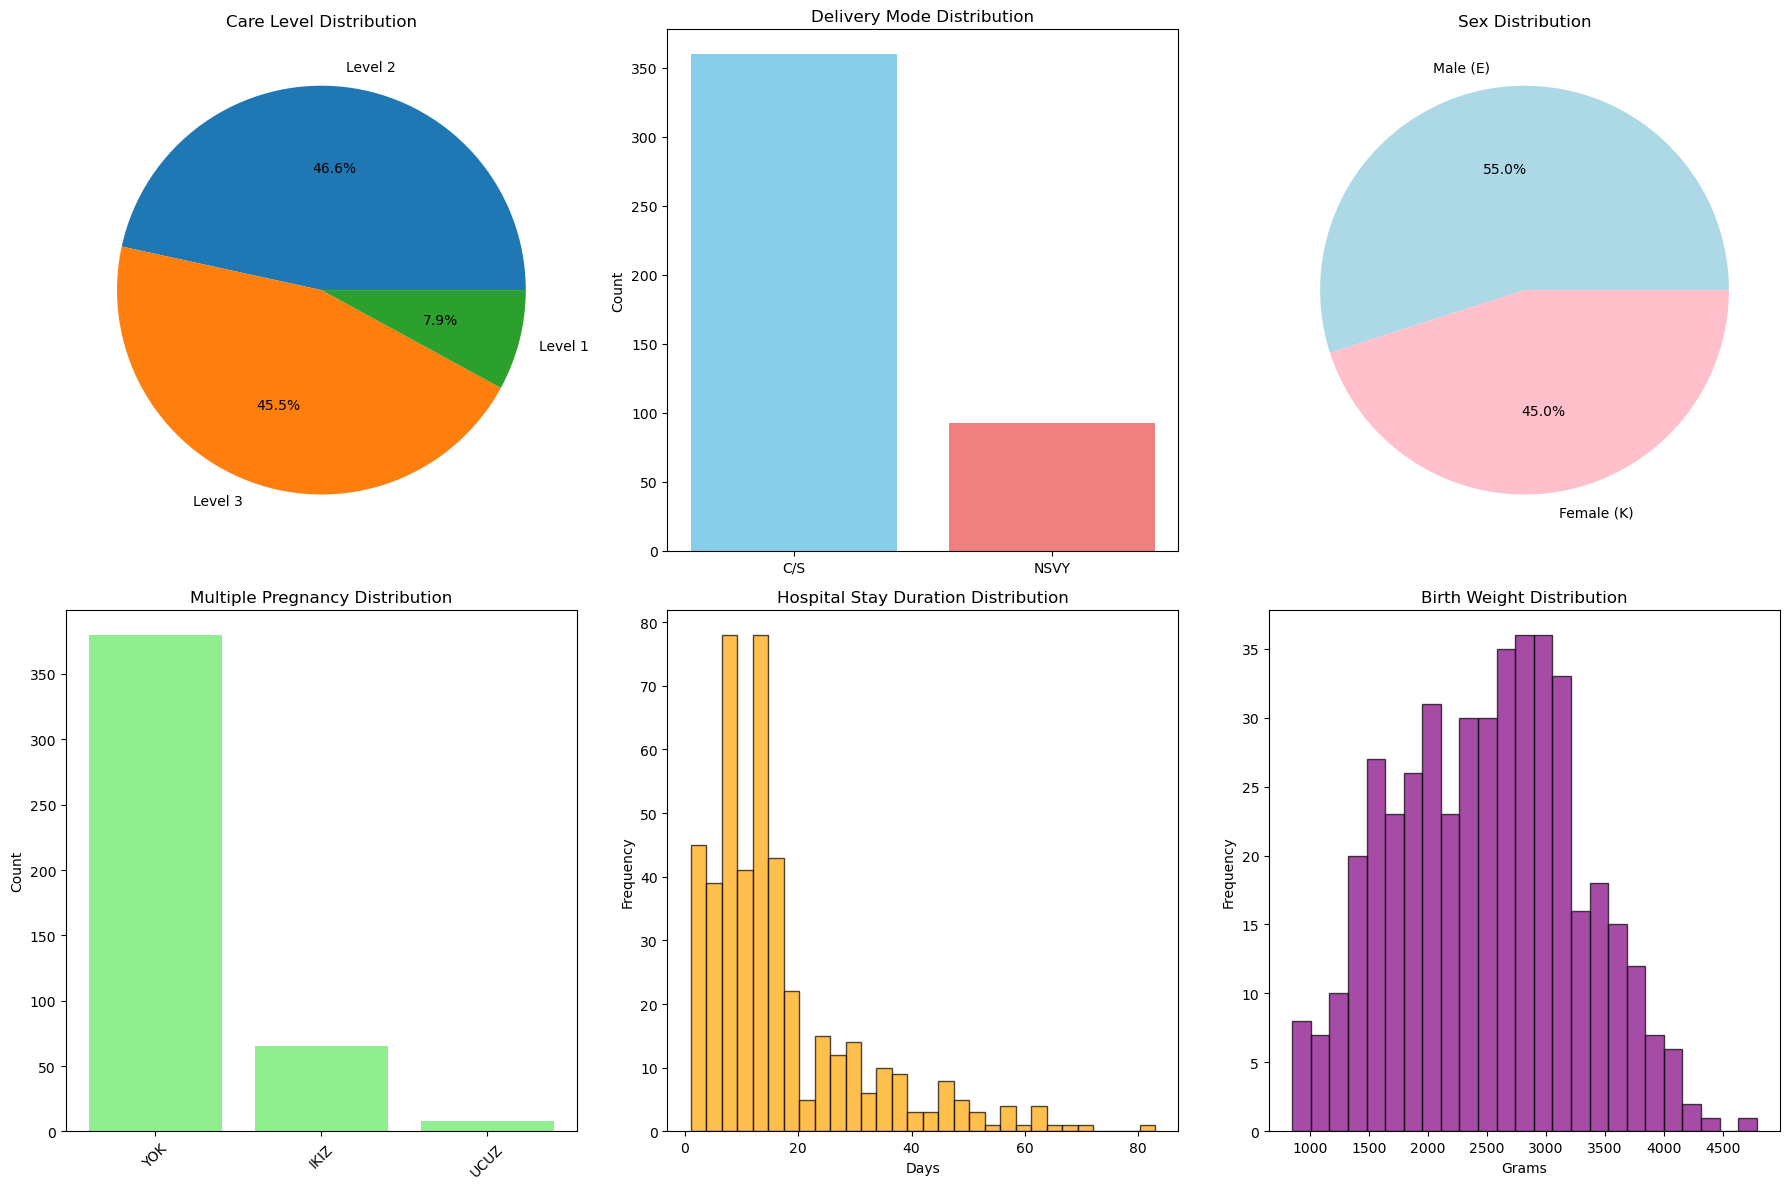

In [72]:
# CELL 4: Exploratory Data Analysis - Categorical Variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Care Level Distribution
care_counts = df['CareLevel'].value_counts()
axes[0,0].pie(care_counts.values, labels=[f'Level {x}' for x in care_counts.index], autopct='%1.1f%%')
axes[0,0].set_title('Care Level Distribution')

# 2. Delivery Mode
delivery_counts = df['DeliveryMode'].value_counts()
axes[0,1].bar(delivery_counts.index, delivery_counts.values, color=['skyblue', 'lightcoral'])
axes[0,1].set_title('Delivery Mode Distribution')
axes[0,1].set_ylabel('Count')

# 3. Sex Distribution
sex_counts = df['Sex'].value_counts()
axes[0,2].pie(sex_counts.values, labels=['Male (E)', 'Female (K)'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
axes[0,2].set_title('Sex Distribution')

# 4. Multiple Pregnancy
multiple_counts = df['MultiplePregnancy'].value_counts()
axes[1,0].bar(range(len(multiple_counts)), multiple_counts.values, color='lightgreen')
axes[1,0].set_xticks(range(len(multiple_counts)))
axes[1,0].set_xticklabels(multiple_counts.index, rotation=45)
axes[1,0].set_title('Multiple Pregnancy Distribution')
axes[1,0].set_ylabel('Count')

# 5. Hospital Stay Duration Distribution
axes[1,1].hist(df['HospitalStayDuration'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_title('Hospital Stay Duration Distribution')
axes[1,1].set_xlabel('Days')
axes[1,1].set_ylabel('Frequency')

# 6. Birth Weight Distribution
axes[1,2].hist(df['BirthWeight'], bins=25, alpha=0.7, color='purple', edgecolor='black')
axes[1,2].set_title('Birth Weight Distribution')
axes[1,2].set_xlabel('Grams')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [73]:
# CELL 5: Data Cleaning & Preprocessing
print("=== DATA CLEANING ===")

# Check for any obvious data quality issues
print("Statistical Summary:")
print(df.describe())

# Check for outliers in key variables
Q1 = df['HospitalStayDuration'].quantile(0.25)
Q3 = df['HospitalStayDuration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nHospital Stay Duration Outliers:")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
outliers = df[(df['HospitalStayDuration'] < lower_bound) | (df['HospitalStayDuration'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# Check for impossible values
print(f"\nData validation:")
print(f"Negative Birth Weight: {(df['BirthWeight'] < 0).sum()}")
print(f"Negative Hospital Stay: {(df['HospitalStayDuration'] < 0).sum()}")
print(f"Gestational Week range: {df['GestationalWeek'].min()} - {df['GestationalWeek'].max()}")

=== DATA CLEANING ===
Statistical Summary:
        PatientID   CareLevel   MotherAge  PregnancyNumber  GestationalWeek  \
count  453.000000  453.000000  453.000000       453.000000       453.000000   
mean   250.309051    2.375276   29.094923         2.501104        35.143488   
std    144.647747    0.627897    5.665241         1.667791         3.236160   
min      1.000000    1.000000   16.000000         1.000000        26.000000   
25%    124.000000    2.000000   25.000000         1.000000        33.000000   
50%    254.000000    2.000000   29.000000         2.000000        35.000000   
75%    374.000000    3.000000   32.000000         3.000000        38.000000   
max    501.000000    3.000000   47.000000        10.000000        41.000000   

       LiveBirthCount  BirthWeight  HospitalizationDay  HospitalStayDuration  
count      453.000000   453.000000          453.000000            453.000000  
mean         2.156733  2504.172185            2.682119             16.479029  
std     

In [74]:
# CELL 6: Feature Engineering & Target Variable Creation
# Create binary target variable for Length of Stay prediction
print("=== TARGET VARIABLE CREATION ===")

# Analyze Hospital Stay Duration distribution
print("Hospital Stay Duration Statistics:")
print(f"Mean: {df['HospitalStayDuration'].mean():.2f} days")
print(f"Median: {df['HospitalStayDuration'].median():.2f} days")
print(f"75th percentile: {df['HospitalStayDuration'].quantile(0.75):.2f} days")

# Define threshold for binary classification
threshold = 25
print(f"\nUsing median ({threshold:.1f} days) as threshold")

# Create binary target: 1 for Long Stay (>= threshold), 0 for Short Stay
df['LongStay'] = (df['HospitalStayDuration'] >= threshold).astype(int)

print(f"\nTarget Variable Distribution:")
target_counts = df['LongStay'].value_counts()
print(f"Short Stay (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"Long Stay (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")

=== TARGET VARIABLE CREATION ===
Hospital Stay Duration Statistics:
Mean: 16.48 days
Median: 12.00 days
75th percentile: 20.00 days

Using median (25.0 days) as threshold

Target Variable Distribution:
Short Stay (0): 364 (80.4%)
Long Stay (1): 89 (19.6%)


In [75]:
# CELL 7: Feature Engineering - Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create a copy for processing
df_processed = df.copy()

print("=== FEATURE ENCODING ===")

# Encode categorical variables
label_encoders = {}
categorical_columns = ['DeliveryMode', 'Sex', 'MultiplePregnancy']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Handle AbortionHistory (YOK means no history)
df_processed['AbortionHistory_encoded'] = df_processed['AbortionHistory'].apply(
    lambda x: 0 if x == 'YOK' else int(x) if str(x).isdigit() else 0
)

# Create additional features
df_processed['MotherAge_Group'] = pd.cut(df_processed['MotherAge'], 
                                       bins=[0, 20, 25, 30, 35, 50], 
                                       labels=['<20', '20-24', '25-29', '30-34', '35+'])
df_processed['MotherAge_Group_encoded'] = LabelEncoder().fit_transform(df_processed['MotherAge_Group'])

# Create preterm birth indicator
df_processed['Preterm'] = (df_processed['GestationalWeek'] < 37).astype(int)

# Low birth weight indicator
df_processed['LowBirthWeight'] = (df_processed['BirthWeight'] < 2500).astype(int)

print(f"\nNew features created:")
print(f"- MotherAge_Group_encoded")
print(f"- Preterm (Gestational Week < 37)")
print(f"- LowBirthWeight (Birth Weight < 2500g)")

=== FEATURE ENCODING ===
DeliveryMode: {'C/S': 0, 'NSVY': 1}
Sex: {'E': 0, 'K': 1}
MultiplePregnancy: {'IKIZ': 0, 'UCUZ': 1, 'YOK': 2}

New features created:
- MotherAge_Group_encoded
- Preterm (Gestational Week < 37)
- LowBirthWeight (Birth Weight < 2500g)


In [76]:
# CELL 8: Feature Selection & Data Preparation
# Select features for modeling
feature_columns = [
    'CareLevel', 'MotherAge', 'PregnancyNumber', 'GestationalWeek', 
    'LiveBirthCount', 'BirthWeight', 'HospitalizationDay',
    'DeliveryMode_encoded', 'Sex_encoded', 'MultiplePregnancy_encoded',
    'AbortionHistory_encoded', 'MotherAge_Group_encoded', 'Preterm', 'LowBirthWeight'
]

X = df_processed[feature_columns]
y = df_processed['LongStay']

print("=== FEATURE SELECTION ===")
print(f"Selected features: {len(feature_columns)}")
print(f"Features: {feature_columns}")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for any remaining missing values
print(f"\nMissing values in features:")
print(X.isnull().sum().sum())

=== FEATURE SELECTION ===
Selected features: 14
Features: ['CareLevel', 'MotherAge', 'PregnancyNumber', 'GestationalWeek', 'LiveBirthCount', 'BirthWeight', 'HospitalizationDay', 'DeliveryMode_encoded', 'Sex_encoded', 'MultiplePregnancy_encoded', 'AbortionHistory_encoded', 'MotherAge_Group_encoded', 'Preterm', 'LowBirthWeight']

Feature matrix shape: (453, 14)
Target vector shape: (453,)

Missing values in features:
0


In [77]:
# CELL 9: Train-Test Split & Data Scaling
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=== TRAIN-TEST SPLIT ===")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures scaled using StandardScaler")
print(f"Training set shape after scaling: {X_train_scaled.shape}")

=== TRAIN-TEST SPLIT ===
Training set: 362 samples
Test set: 91 samples
Training target distribution: [291  71]
Test target distribution: [73 18]

Features scaled using StandardScaler
Training set shape after scaling: (362, 14)


In [78]:
# CELL 10: Classical Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize classical models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier': SVC(probability=True, random_state=42)
}

print("=== CLASSICAL MACHINE LEARNING MODELS ===")

# Cross-validation results
cv_results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Use scaled data for models that benefit from scaling
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    cv_results[name] = cv_scores
    print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train models on full training set
trained_models = {}
for name, model in models.items():
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier']:
        model.fit(X_train_scaled, y_train)
        trained_models[name] = (model, True)  # True indicates scaled data needed
    else:
        model.fit(X_train, y_train)
        trained_models[name] = (model, False)  # False indicates original data
    
print(f"\nAll classical models trained successfully!")

=== CLASSICAL MACHINE LEARNING MODELS ===
Logistic Regression: 0.9364 (+/- 0.0483)
Random Forest: 0.9475 (+/- 0.0322)
Extra Trees: 0.9558 (+/- 0.0441)
K-Nearest Neighbors: 0.8811 (+/- 0.0457)
Support Vector Classifier: 0.9281 (+/- 0.0539)

All classical models trained successfully!


In [79]:
# CELL 11: Ensemble Machine Learning Models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    
try:
    from catboost import CatBoostClassifier
    catboost_available = True
except ImportError:
    catboost_available = False

# Initialize ensemble models
ensemble_models = {
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

if xgb_available:
    ensemble_models['XGBoost'] = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')

if catboost_available:
    ensemble_models['CatBoost'] = CatBoostClassifier(n_estimators=100, random_state=42, verbose=False)

print("=== ENSEMBLE MACHINE LEARNING MODELS ===")
print(f"Available ensemble models: {list(ensemble_models.keys())}")

# Cross-validation for ensemble models
for name, model in ensemble_models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_results[name] = cv_scores
    print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train ensemble models
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    trained_models[name] = (model, False)

print(f"\nAll ensemble models trained successfully!")

=== ENSEMBLE MACHINE LEARNING MODELS ===
Available ensemble models: ['AdaBoost', 'Gradient Boosting']
AdaBoost: 0.9365 (+/- 0.0330)
Gradient Boosting: 0.9447 (+/- 0.0304)

All ensemble models trained successfully!


In [80]:
# CELL 12: Model Evaluation & Comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("=== MODEL EVALUATION ON TEST SET ===")

results = []
predictions = {}

for name, (model, needs_scaling) in trained_models.items():
    # Make predictions
    if needs_scaling:
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    predictions[name] = y_pred_proba
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('AUC', ascending=False)
print(results_df.round(4))

=== MODEL EVALUATION ON TEST SET ===
                       Model  Accuracy  Precision  Recall  F1-Score     AUC
0        Logistic Regression    0.9341     0.7500  1.0000    0.8571  0.9932
5                   AdaBoost    0.9231     0.7391  0.9444    0.8293  0.9893
1              Random Forest    0.9341     0.8000  0.8889    0.8421  0.9893
4  Support Vector Classifier    0.9560     0.8889  0.8889    0.8889  0.9871
6          Gradient Boosting    0.9451     0.8095  0.9444    0.8718  0.9855
2                Extra Trees    0.9231     0.8235  0.7778    0.8000  0.9852
3        K-Nearest Neighbors    0.8901     0.7000  0.7778    0.7368  0.9559


In [81]:
# CELL 13: Voting Classifier
from sklearn.ensemble import VotingClassifier

print("=== VOTING CLASSIFIER ===")

# Select top 5 models for voting
top_models = results_df.head(5)['Model'].tolist()
print(f"Top 5 models for voting: {top_models}")

# Prepare models for voting (ensure they all use same data format)
voting_models = []
for name in top_models:
    model, needs_scaling = trained_models[name]
    if needs_scaling:
        # For models that need scaling, we'll retrain with original data for consistency
        if name == 'Logistic Regression':
            voting_models.append((name.replace(' ', '_').lower(), LogisticRegression(random_state=42)))
        elif name == 'K-Nearest Neighbors':
            voting_models.append((name.replace(' ', '_').lower(), KNeighborsClassifier(n_neighbors=5)))
        elif name == 'Support Vector Classifier':
            voting_models.append((name.replace(' ', '_').lower(), SVC(probability=True, random_state=42)))
    else:
        voting_models.append((name.replace(' ', '_').lower(), model))

# Create Soft Voting Classifier
soft_voting = VotingClassifier(
    estimators=voting_models,
    voting='soft'
)

# Train voting classifier
soft_voting.fit(X_train, y_train)

# Evaluate voting classifier
y_pred_voting = soft_voting.predict(X_test)
y_pred_proba_voting = soft_voting.predict_proba(X_test)[:, 1]

voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_auc = roc_auc_score(y_test, y_pred_proba_voting)

print(f"Soft Voting Classifier Performance:")
print(f"Accuracy: {voting_accuracy:.4f}")
print(f"AUC: {voting_auc:.4f}")

# Add voting results to comparison
voting_result = {
    'Model': 'Soft Voting',
    'Accuracy': voting_accuracy,
    'Precision': precision_score(y_test, y_pred_voting),
    'Recall': recall_score(y_test, y_pred_voting),
    'F1-Score': f1_score(y_test, y_pred_voting),
    'AUC': voting_auc
}

final_results = pd.concat([results_df, pd.DataFrame([voting_result])], ignore_index=True)
final_results = final_results.sort_values('AUC', ascending=False)
print(f"\nFinal Results with Voting:")
print(final_results.round(4))

=== VOTING CLASSIFIER ===
Top 5 models for voting: ['Logistic Regression', 'AdaBoost', 'Random Forest', 'Support Vector Classifier', 'Gradient Boosting']
Soft Voting Classifier Performance:
Accuracy: 0.9451
AUC: 0.9932

Final Results with Voting:
                       Model  Accuracy  Precision  Recall  F1-Score     AUC
0        Logistic Regression    0.9341     0.7500  1.0000    0.8571  0.9932
7                Soft Voting    0.9451     0.8095  0.9444    0.8718  0.9932
1                   AdaBoost    0.9231     0.7391  0.9444    0.8293  0.9893
2              Random Forest    0.9341     0.8000  0.8889    0.8421  0.9893
3  Support Vector Classifier    0.9560     0.8889  0.8889    0.8889  0.9871
4          Gradient Boosting    0.9451     0.8095  0.9444    0.8718  0.9855
5                Extra Trees    0.9231     0.8235  0.7778    0.8000  0.9852
6        K-Nearest Neighbors    0.8901     0.7000  0.7778    0.7368  0.9559


In [82]:
# CELL 14: Feature Importance Analysis
# Get feature importance from the best tree-based model
best_model_name = final_results.iloc[0]['Model']

if best_model_name in ['Random Forest', 'Extra Trees', 'XGBoost', 'Gradient Boosting']:
    best_model, _ = trained_models[best_model_name]
    
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"=== FEATURE IMPORTANCE ({best_model_name}) ===")
        print(feature_importance)
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
        plt.title(f'Top 10 Feature Importance - {best_model_name}')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()

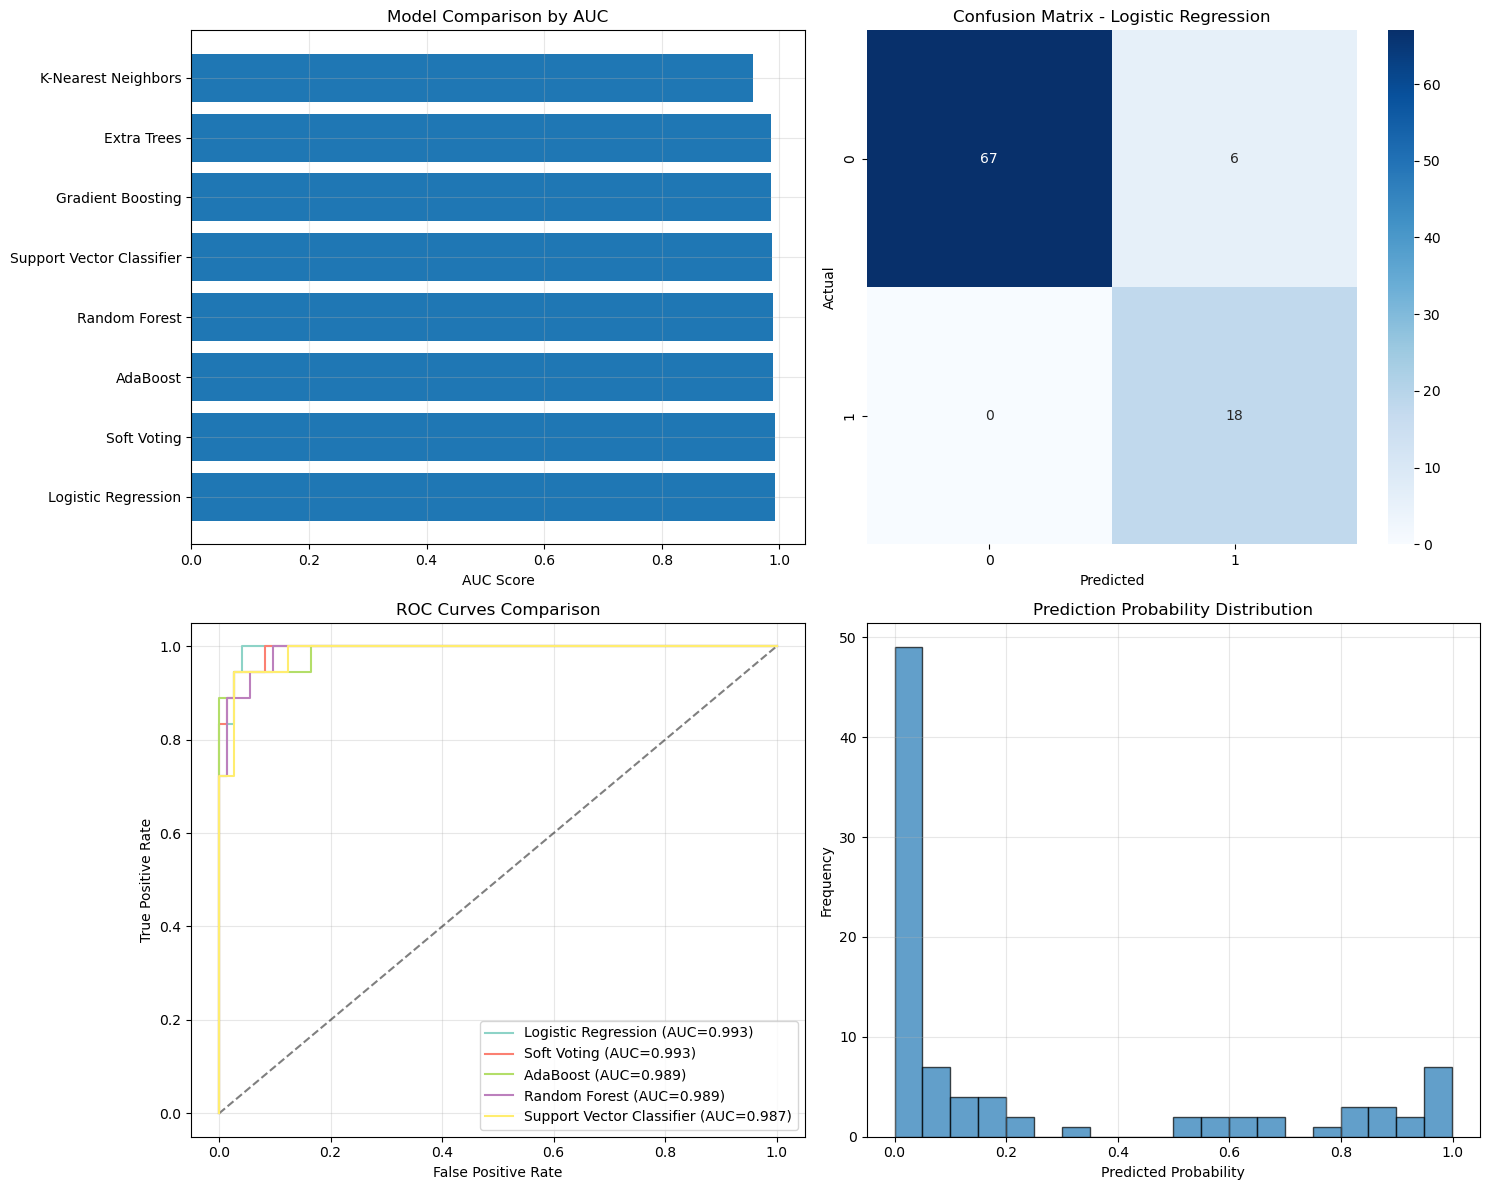

In [83]:
# CELL 15: Final Model Performance Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Comparison
models_comp = final_results.head(8)
axes[0,0].barh(models_comp['Model'], models_comp['AUC'])
axes[0,0].set_xlabel('AUC Score')
axes[0,0].set_title('Model Comparison by AUC')
axes[0,0].grid(True, alpha=0.3)

# 2. Confusion Matrix for best model
best_model, needs_scaling = trained_models[final_results.iloc[0]['Model']] if final_results.iloc[0]['Model'] != 'Soft Voting' else (soft_voting, False)
if final_results.iloc[0]['Model'] == 'Soft Voting':
    y_pred_best = y_pred_voting
else:
    if needs_scaling:
        y_pred_best = best_model.predict(X_test_scaled)
    else:
        y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title(f'Confusion Matrix - {final_results.iloc[0]["Model"]}')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# 3. ROC Curves for top models
from sklearn.metrics import roc_curve
axes[1,0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
colors = plt.cm.Set3(np.linspace(0, 1, len(final_results.head(5))))

for i, (_, row) in enumerate(final_results.head(5).iterrows()):
    model_name = row['Model']
    if model_name == 'Soft Voting':
        y_prob = y_pred_proba_voting
    else:
        y_prob = predictions[model_name]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    axes[1,0].plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC={row["AUC"]:.3f})')

axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('ROC Curves Comparison')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Prediction Distribution
axes[1,1].hist(y_pred_proba_voting if final_results.iloc[0]['Model'] == 'Soft Voting' else predictions[final_results.iloc[0]['Model']], 
               bins=20, alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Predicted Probability')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Prediction Probability Distribution')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [84]:
# CELL 16: Clinical Interpretation & Summary
print("="*60)
print("NICU LENGTH OF STAY PREDICTION - CLINICAL SUMMARY")
print("="*60)

print(f"\nDATASET OVERVIEW:")
print(f"   • Total patients: {len(df)}")
print(f"   • Average hospital stay: {df['HospitalStayDuration'].mean():.1f} days")
print(f"   • Threshold for long stay: ≥{threshold:.1f} days")
print(f"   • Long stay cases: {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

print(f"\nBEST MODEL PERFORMANCE:")
best_result = final_results.iloc[0]
print(f"   • Best Model: {best_result['Model']}")
print(f"   • Accuracy: {best_result['Accuracy']:.1%}")
print(f"   • AUC Score: {best_result['AUC']:.3f}")
print(f"   • Precision: {best_result['Precision']:.1%}")
print(f"   • Recall: {best_result['Recall']:.1%}")

print(f"\nCLINICAL IMPLICATIONS:")
print(f"   • Model can predict long-stay patients with {best_result['Accuracy']:.1%} accuracy")
print(f"   • This helps with resource planning and family counseling")
print(f"   • Early identification enables proactive care management")

if 'feature_importance' in locals():
    print(f"\nKEY PREDICTIVE FACTORS:")
    for i, row in feature_importance.head(5).iterrows():
        print(f"   • {row['feature']}: {row['importance']:.3f}")

print(f"\nRECOMMENDATIONS:")
print(f"   • Deploy model for real-time prediction during admission")
print(f"   • Monitor model performance with new data")
print(f"   • Consider additional features like comorbidities")
print(f"   • Validate with clinical experts regularly")

print("="*60)

NICU LENGTH OF STAY PREDICTION - CLINICAL SUMMARY

DATASET OVERVIEW:
   • Total patients: 453
   • Average hospital stay: 16.5 days
   • Threshold for long stay: ≥25.0 days
   • Long stay cases: 89 (19.6%)

BEST MODEL PERFORMANCE:
   • Best Model: Logistic Regression
   • Accuracy: 93.4%
   • AUC Score: 0.993
   • Precision: 75.0%
   • Recall: 100.0%

CLINICAL IMPLICATIONS:
   • Model can predict long-stay patients with 93.4% accuracy
   • This helps with resource planning and family counseling
   • Early identification enables proactive care management

KEY PREDICTIVE FACTORS:
   • BirthWeight: 0.278
   • CareLevel: 0.144
   • GestationalWeek: 0.116
   • MotherAge: 0.093
   • LowBirthWeight: 0.061

RECOMMENDATIONS:
   • Deploy model for real-time prediction during admission
   • Monitor model performance with new data
   • Consider additional features like comorbidities
   • Validate with clinical experts regularly


In [85]:
# CELL 17: Save Model and Preprocessing Pipeline
import joblib
import pickle

print("=== SAVING TRAINED MODEL AND PREPROCESSORS ===")

# Save the best model
if final_results.iloc[0]['Model'] == 'Soft Voting':
    joblib.dump(soft_voting, 'best_nicu_model.pkl')
    print("Soft Voting Classifier saved as 'best_nicu_model.pkl'")
else:
    best_model, _ = trained_models[final_results.iloc[0]['Model']]
    joblib.dump(best_model, 'best_nicu_model.pkl')
    print(f"{final_results.iloc[0]['Model']} saved as 'best_nicu_model.pkl'")

# Save preprocessors
joblib.dump(scaler, 'nicu_scaler.pkl')
joblib.dump(label_encoders, 'nicu_label_encoders.pkl')

# Save feature columns and threshold
model_info = {
    'feature_columns': feature_columns,
    'threshold': threshold,
    'model_type': final_results.iloc[0]['Model'],
    'performance_metrics': final_results.iloc[0].to_dict()
}

with open('nicu_model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("Scaler saved as 'nicu_scaler.pkl'")
print("Label encoders saved as 'nicu_label_encoders.pkl'")
print("Model info saved as 'nicu_model_info.pkl'")

print(f"\nMODEL DEPLOYMENT INFO:")
print(f"   • Model Type: {model_info['model_type']}")
print(f"   • Features Required: {len(feature_columns)}")
print(f"   • Expected Input Shape: (n_samples, {len(feature_columns)})")
print(f"   • Output: Binary prediction (0=Short stay, 1=Long stay)")
print(f"   • Prediction Threshold: {threshold:.1f} days")

=== SAVING TRAINED MODEL AND PREPROCESSORS ===
Logistic Regression saved as 'best_nicu_model.pkl'
Scaler saved as 'nicu_scaler.pkl'
Label encoders saved as 'nicu_label_encoders.pkl'
Model info saved as 'nicu_model_info.pkl'

MODEL DEPLOYMENT INFO:
   • Model Type: Logistic Regression
   • Features Required: 14
   • Expected Input Shape: (n_samples, 14)
   • Output: Binary prediction (0=Short stay, 1=Long stay)
   • Prediction Threshold: 25.0 days
